# **Customer Segmentation Data For Marketing Analytics**

### **Objectives**
- **Understand the customer:** Create customer segments with similar characteristics.
- **Develop targeted strategies for marketing**: Personalize and optimize marketing strategies based on each customer segment
- **Increase marketing effiency**: Optimize marketing costs and campaigns, thereby increasing revenue and strategy performance
- **Maintain and enhance customer satisfaction**: Improve customer experience and increase long-term customer value

### **Dataset Overview**
Dataset contains 9 columns:
- **id**: Unique identifier for each customer.
- **age**: Age of the customer.
- **gender**: Gender of the customer (Male, Female, Other).
- **income**: Annual income of the customer (in USD).
- **spending_score**: Spending score (1-100), indicating the customer's spending - behavior and loyalty.
- **membership_years**: Number of years the customer has been a member.
- **purchase_frequency**: Number of purchases made by the customer in the last year.
- **preferred_category**: Preferred shopping category (Electronics, Clothing,
Groceries, Home & Garden, Sports).
- **last_purchase_amount**: Amount spent by the customer on their last purchase (in USD).

(Source: *Kaggle*)

# 1. Import Libraries and Load Data

In [ ]:
#importing necessary librariess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load data
df = pd.read_csv('/content/drive/MyDrive/Dataset/customer_segmentation_data.csv', header=0)
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


# 2. Data Exploration

In [ ]:
#summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [ ]:
#shape of dataset
df.shape

(1000, 9)

In [ ]:
#unique value for each feature
columns = df.columns
for col in columns:
  print(f'{col}: {df[col].value_counts().size}')

id: 1000
age: 52
gender: 3
income: 996
spending_score: 100
membership_years: 10
purchase_frequency: 50
preferred_category: 5
last_purchase_amount: 994


In [ ]:
#find unique value in 'Gender' and 'preferred_category'
gender_cate = ['gender', 'preferred_category']
for col in gender_cate:
  print(f'{df[col].value_counts()}', '\n')

gender
Male      357
Other     327
Female    316
Name: count, dtype: int64 

preferred_category
Electronics      215
Sports           210
Home & Garden    206
Groceries        199
Clothing         170
Name: count, dtype: int64 



In [ ]:
#check duplicates
df.drop_duplicates()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08
...,...,...,...,...,...,...,...,...,...
995,996,57,Male,112170,57,6,1,Clothing,313.64
996,997,23,Other,65337,76,10,23,Groceries,632.83
997,998,23,Male,113097,40,5,42,Sports,75.09
998,999,22,Female,113695,63,7,44,Electronics,505.16


    No duplicates

In [ ]:
#summary Statistics
df.describe()

,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,288.819436,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,1.000000,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,250.750000,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,500.500000,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,750.250000,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,1000.000000,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000


Examine distribution of numerical features

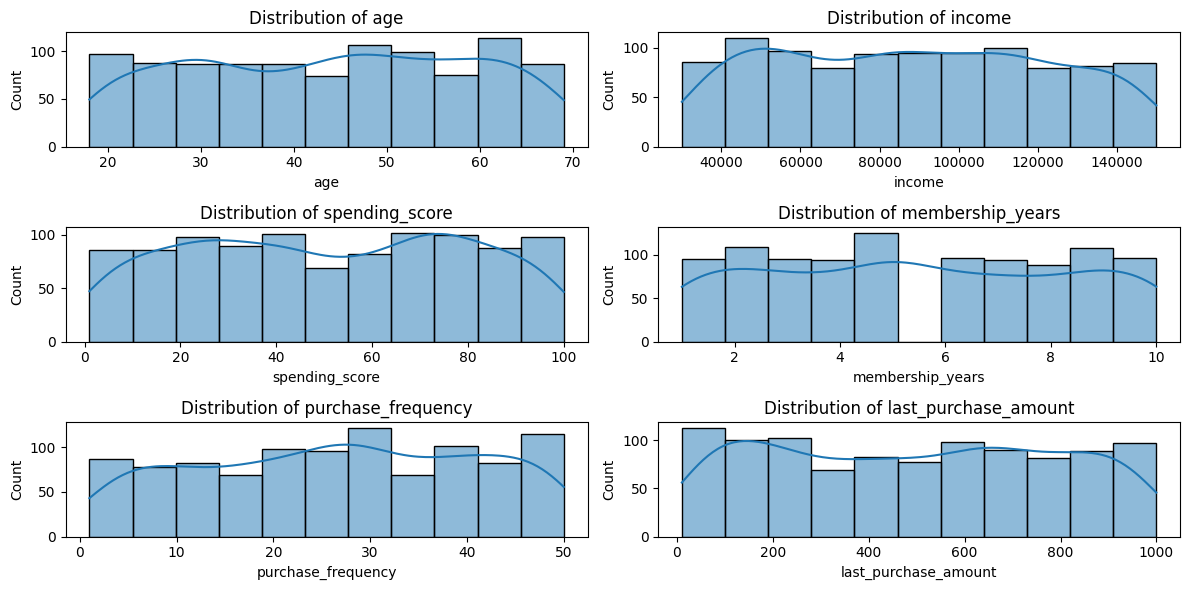

In [ ]:
def plot_distribution(dataframe, numeric_cols):
  cols = 2
  rows = (len(numeric_cols) + 1) // 2

  fig, axes = plt.subplots(rows, cols, figsize=(12,6))
  axes = axes.flatten()
  for i, col in enumerate(numeric_cols):
    sns.histplot(df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
  plt.tight_layout()
  plt.show()

  #removing leftover subplots
  for k in range(i+1, len(numeric_cols)):
    fig.delaxes(axes[k])

#plotting
cols = ['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']
plot_distribution(df, cols)

    Generally, each of these numerical features are relatively normal distributed

Visualizing the categorical features

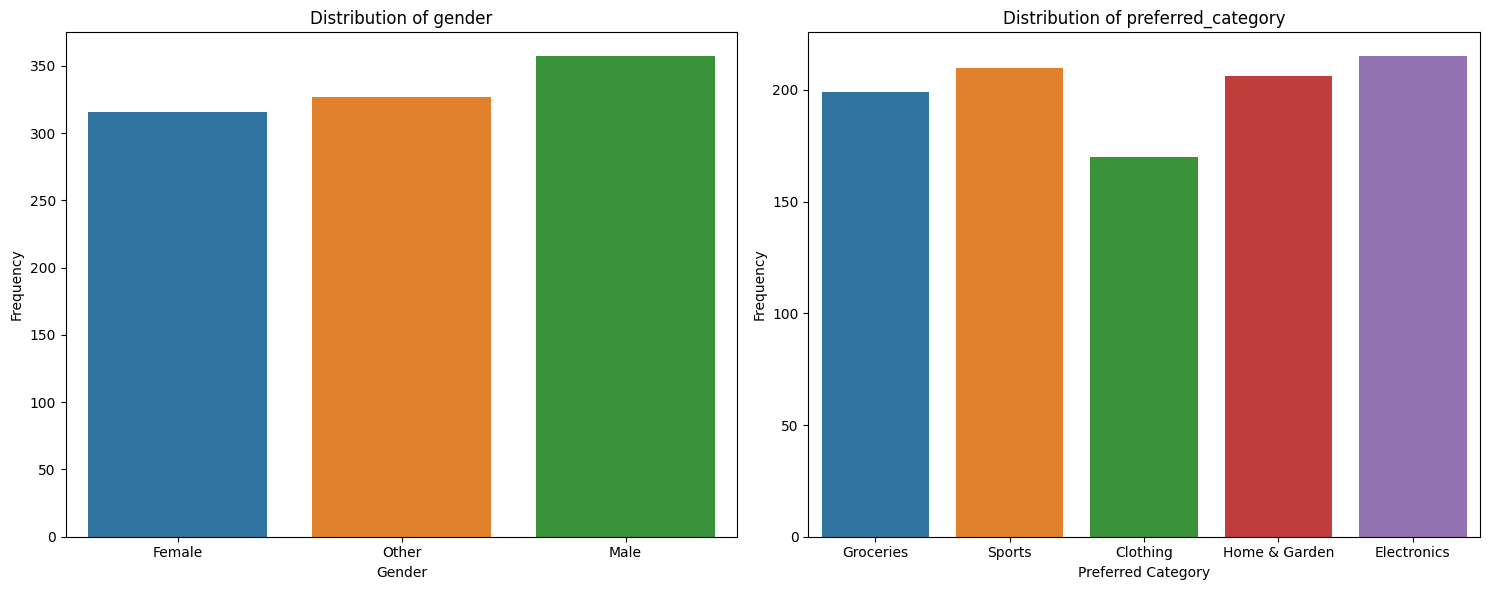

In [ ]:
categoricals = ['gender', 'preferred_category']

fig, axes = plt.subplots(1,2,figsize=(15,6))

#plotting Gender feature
sns.countplot(df, x='gender', palette='tab10', ax=axes[0])
axes[0].set_title(f"Distribution of {categoricals[0]}")
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Frequency')

#plotting preferred_category feature
sns.countplot(df, x='preferred_category', palette='tab10',ax=axes[1])
axes[1].set_title(f"Distribution of {categoricals[1]}")
axes[1].set_xlabel('Preferred Category')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



Visualizing Correlation using heatmap

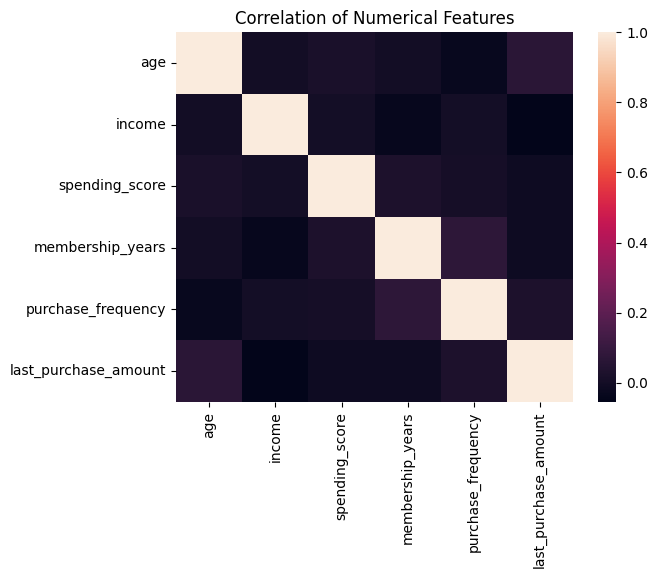

In [ ]:
#calculate correlation
corr = df.select_dtypes('number').drop('id', axis=1).corr()
sns.heatmap(corr)
plt.title("Correlation of Numerical Features")
plt.show()

# 3. Data Wrangling

## 3.1 Handle Missing Value

In [ ]:
df.isnull().sum()

,0
id,0
age,0
gender,0
income,0
spending_score,0
membership_years,0
purchase_frequency,0
preferred_category,0
last_purchase_amount,0


    There are no nulls values

## 3.2 Encode Categorical Variables

In [ ]:
df.select_dtypes("object").nunique()

,0
gender,3
preferred_category,5


In [ ]:
from sklearn.preprocessing import OneHotEncoder

#initial OneHotEncoder Object
encoder = OneHotEncoder(drop='first', sparse=False) #using drop='first' để loại bỏ đa cộng tuyển
ecoded_data = encoder.fit_transform(df[['gender', 'preferred_category']])

#covert result to dataframe
encoded_df = pd.DataFrame(ecoded_data, columns=encoder.get_feature_names_out())


#append to dataframe
df_new = pd.concat([df, encoded_df], axis=1)

#drop 'gender' and 'preferred_category' columns for training session
df_new.drop(['gender', 'preferred_category'], axis=1, inplace=True)


## 3.3 Feature Scaling

In [ ]:
#using StandardScaler
from sklearn.preprocessing import StandardScaler

#selecting numeric features for scaling
numeric_features = ['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']

#applying StandardScaler
scaler = StandardScaler()
encoded_numeric = scaler.fit_transform(df_new[numeric_features])
encoded_numeric = pd.DataFrame(encoded_numeric, columns=scaler.get_feature_names_out())
encoded_numeric.head()

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
0,-0.384644,0.316868,1.358468,-0.865010,-0.182348,-1.281540
1,-1.515362,-0.282016,0.321865,-1.215358,1.082005,-1.523763
2,1.078639,1.112778,-0.714738,-1.215358,0.098620,-0.230005
3,-0.251618,-1.210096,0.805613,1.237080,-1.516943,1.690080
4,1.411203,1.523374,-1.025718,-0.865010,-0.112106,-0.491443


In [ ]:
#switch scaled data to dataframe
df_new[numeric_features] = encoded_numeric

#set id column to index
df_new.set_index('id', inplace=True)


In [ ]:
df_new

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Male,gender_Other,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports
id,,,,,,,,,,,,
1,-0.384644,0.316868,1.358468,-0.865010,-0.182348,-1.281540,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.515362,-0.282016,0.321865,-1.215358,1.082005,-1.523763,0.0,0.0,0.0,0.0,0.0,1.0
3,1.078639,1.112778,-0.714738,-1.215358,0.098620,-0.230005,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.251618,-1.210096,0.805613,1.237080,-1.516943,1.690080,0.0,1.0,0.0,0.0,1.0,0.0
5,1.411203,1.523374,-1.025718,-0.865010,-0.112106,-0.491443,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.879100,0.691806,0.218205,0.186035,-1.797910,-0.604570,1.0,0.0,0.0,0.0,0.0,0.0
997,-1.382336,-0.677034,0.874720,1.587428,-0.252590,0.475247,0.0,1.0,0.0,1.0,0.0,0.0
998,-1.382336,0.718900,-0.369203,-0.164313,1.082005,-1.411583,1.0,0.0,0.0,0.0,0.0,1.0


# 4. Customer Segmentation

## 4.1 Choosing the Number of Clusters (K) Using the Elbow Method vs Silhouette Score

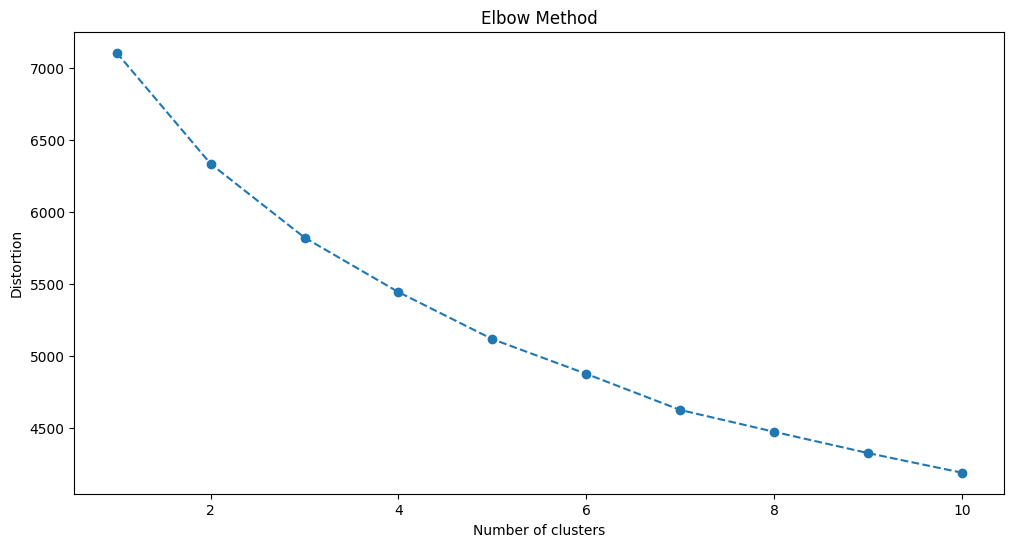

In [ ]:
#Ploting Elbow Method
distortion = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(df_new)
  distortion.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.plot(range(1,11), distortion, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

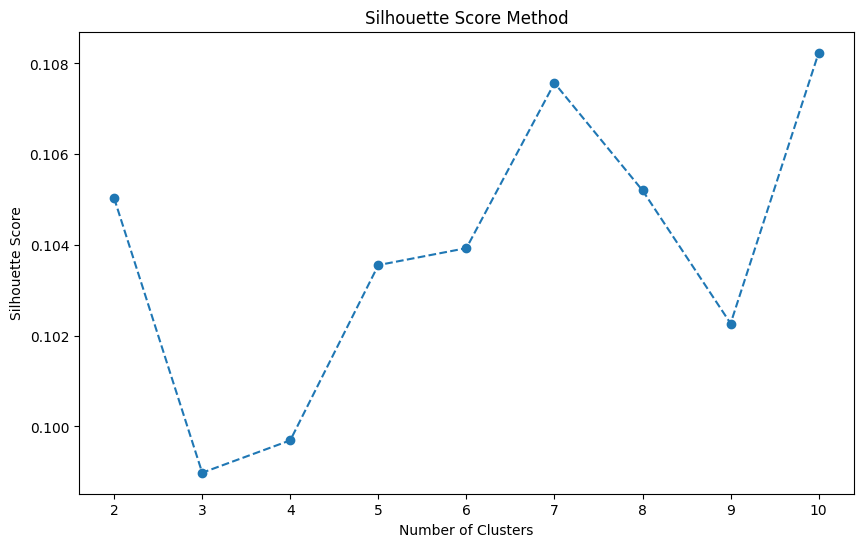

In [ ]:
#Plot Silhouette score (except k=1)

silhouette_scores = []  # Đổi tên biến

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_new)

    score = silhouette_score(df_new, kmeans.labels_)

    silhouette_scores.append(score)

plt.figure(figsize=(10,6))
plt.plot(range(2,11), silhouette_scores, marker='o', linestyle='--')
plt.title("Silhouette Score Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

Elbow Method:
- Quan sát thấy rằng, khi tăng số cụm lên k=3 thì Distortion bắt đầu giảm chậm lại

Silhouette:
- Quan sát thấy rằng, k=10 và k=7 có silhouette score là cao nhất, nhưng sự chênh lệch là không rõ ràng so với số cụm thấp hơn. Việc lựa chọn số cụm có silhouette là cao nhất không phù hợp trong trường hợp này, có khả năng sẽ dẫn đến phức tạp trong mô hình.

**Tổng Kết:**
Vì không có sự chênh lệch rõ ràng giữa các chỉ số Silhouette ở các cụm (k) khác nhau. Thêm vào đó, dựa vào Elbow Method ta có thể thấy số cụm k=3 thì quán tính của distortion bắt đầu chậm lại. Vì vậy lựa chọn k=3 để xây dựng mô hình phân khúc khách hàng.





## 4.2 Model Building and Visualization (PCA)



Model Fitting

In [ ]:
#apply kmeans algo with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_new)

#Append cluster label after training to the original data
df_new['cluster'] = kmeans.labels_

In [ ]:
df_new

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Male,gender_Other,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports,cluster
id,,,,,,,,,,,,,
1,-0.384644,0.316868,1.358468,-0.865010,-0.182348,-1.281540,0.0,0.0,0.0,1.0,0.0,0.0,2
2,-1.515362,-0.282016,0.321865,-1.215358,1.082005,-1.523763,0.0,0.0,0.0,0.0,0.0,1.0,0
3,1.078639,1.112778,-0.714738,-1.215358,0.098620,-0.230005,0.0,0.0,0.0,0.0,0.0,0.0,2
4,-0.251618,-1.210096,0.805613,1.237080,-1.516943,1.690080,0.0,1.0,0.0,0.0,1.0,0.0,1
5,1.411203,1.523374,-1.025718,-0.865010,-0.112106,-0.491443,0.0,0.0,1.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.879100,0.691806,0.218205,0.186035,-1.797910,-0.604570,1.0,0.0,0.0,0.0,0.0,0.0,2
997,-1.382336,-0.677034,0.874720,1.587428,-0.252590,0.475247,0.0,1.0,0.0,1.0,0.0,0.0,0
998,-1.382336,0.718900,-0.369203,-0.164313,1.082005,-1.411583,1.0,0.0,0.0,0.0,0.0,1.0,0


Visualizing Clustered Segmentation (PCA - Principle Component Analysis):
phân tích thành phần chính giúp làm giảm đi chiều không gian của dữ liệu thật và cho phép việc trực quan hóa các cụm ở chiều không gian thấp hơn. (lower-dimensional space)

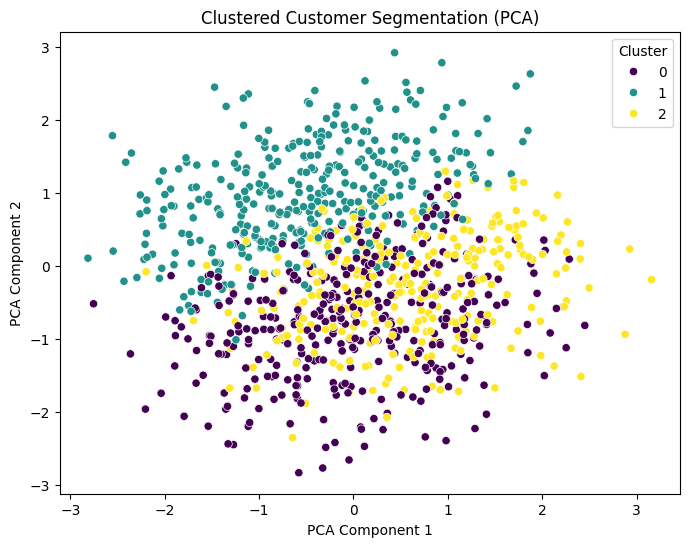

In [ ]:
#perform PCA for dismensionality reduction to 2 components
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(df_new.drop('cluster', axis=1, errors='ignore'))

#add PCA to dataframe
df_new['PCA1'] = pca_components[:,0]
df_new['PCA2'] = pca_components[:,1]

#initialize k-means k=4
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(df_new.drop(['cluster', 'PCA1', 'PCA2'], axis=1, errors='ignore'))
df_new['cluster'] = labels

#visualize clusters based on PCA components
plt.figure(figsize=(8,6))
sns.scatterplot(df_new, x='PCA1', y='PCA2', hue='cluster', palette='viridis')
plt.title("Clustered Customer Segmentation (PCA)")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()



# 5. Analyze and Profile the Customer Segments

In [ ]:
#set index equal to id and drop it (in original dataframe).
df.set_index('id', inplace=True)

#set cluster column to original dataframe
df['cluster'] = df_new['cluster']
df['cluster']
df.head(5)

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,cluster
id,,,,,,,,,
1,38,Female,99342,90,3,24,Groceries,113.53,2
2,21,Female,78852,60,2,42,Sports,41.93,0
3,60,Female,126573,30,2,28,Clothing,424.36,2
4,40,Other,47099,74,9,5,Home & Garden,991.93,1
5,65,Female,140621,21,3,25,Electronics,347.08,2


First, Examine how many customers in each segment

In [ ]:
#Divide into 4 segments
segment1 = df[df['cluster'] == 0]
segment2 = df[df['cluster'] == 1]
segment3 = df[df['cluster'] == 2]



#print number of customers in each segment
print(f"Segment 1: {segment1.shape[0]} customers")
print(f"Segment 2: {segment2.shape[0]} customers")
print(f"Segment 3: {segment3.shape[0]} customers")



Segment 1: 361 customers
Segment 2: 348 customers
Segment 3: 291 customers


`Overview of 3 Segments`

In [ ]:
numeric_features = df.select_dtypes('number')
cluster_profiling = numeric_features.groupby('cluster').mean()
cluster_profiling

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
cluster,,,,,,
0,27.867036,88163.858726,51.277008,5.155125,27.922438,442.036371
1,52.502874,77838.534483,50.554598,5.784483,29.370690,758.645460
2,53.099656,101669.542955,50.106529,5.481100,21.632302,236.305567


### `Segment 1`

    The most Preferred Category in segment 1

In [ ]:
preferred_category = segment1['preferred_category']
counts =  preferred_category.value_counts()
proportion = preferred_category.value_counts(normalize=True).mul(100).round(1)
pd.DataFrame({'Counts': counts, 'Proportion %': proportion})

,Counts,Proportion %
preferred_category,,
Sports,79,21.9
Home & Garden,79,21.9
Electronics,79,21.9
Groceries,66,18.3
Clothing,58,16.1


    Proportion of each gender in segment 1

In [ ]:
gender = segment1['gender']
counts =  gender.value_counts()
proportion = gender.value_counts(normalize=True).mul(100).round(1)
pd.DataFrame({'Counts': counts, 'Proportion %': proportion})

,Counts,Proportion %
gender,,
Male,139,38.5
Female,113,31.3
Other,109,30.2


### `Segment 2`

    The most Preferred Category in segment 2

In [ ]:
preferred_category = segment2['preferred_category']
counts =  preferred_category.value_counts()
proportion = preferred_category.value_counts(normalize=True).mul(100).round(1)
pd.DataFrame({'Counts': counts, 'Proportion': proportion})

,Counts,Proportion
preferred_category,,
Home & Garden,73,21.0
Groceries,72,20.7
Sports,72,20.7
Electronics,72,20.7
Clothing,59,17.0


    Proportion of each gender in segment 2

In [ ]:
gender = segment2['gender']
counts =  gender.value_counts()
proportion = gender.value_counts(normalize=True).mul(100).round(1)
pd.DataFrame({'Counts': counts, 'Proportion %': proportion})

,Counts,Proportion %
gender,,
Other,129,37.1
Male,121,34.8
Female,98,28.2


### `Segment 3`

    The most Preferred Category in segment 3

In [ ]:
preferred_category = segment3['preferred_category']
counts =  preferred_category.value_counts()
proportion = preferred_category.value_counts(normalize=True).mul(100).round(1)
pd.DataFrame({'Counts': counts, 'Proportion': proportion})

,Counts,Proportion
preferred_category,,
Electronics,64,22.0
Groceries,61,21.0
Sports,59,20.3
Home & Garden,54,18.6
Clothing,53,18.2


    Proportion of each gender in segment 3


In [ ]:
gender = segment3['gender']
counts =  gender.value_counts()
proportion = gender.value_counts(normalize=True).mul(100).round(1)
pd.DataFrame({'Counts': counts, 'Proportion %': proportion})

,Counts,Proportion %
gender,,
Female,105,36.1
Male,97,33.3
Other,89,30.6


### **Interpret Cluster Characteristics**
**Segment 1**
- Average Age: 28 (khách hàng trẻ)
- Average Income: $88,163 (thu nhập khá)
- Gender: Male
- Moderate Spending Score: 51
- Purchase Frequency: 28 lần /năm (tần suất mua sắm khá cao)
- Most preferred category: Electronics | Sports | Home & Garden

**Segment 2**
- Average Age: 53 (khách hàng tuổi trung niên)
- Average Income: $77,838 (thu nhập khá)
- Gender: Other
- Moderate Spending Score: 51
- Purchase Frequency: 29 lần /năm (tần suất mua sắm khá cao)
- Most preferred category: Groceries

**Segment 3**
- Average Age: 48 (khách hàng tuổi trung niên)
- Average Income: $101,669 (thu nhập cao)
- Gender: Female
- Moderate Spending Score: 50
- Purchase Frequency: 22 lần /năm (tần suất mua sắm thấp)
- Most preferred category: Electronics



# 6. Actionable Insights and Recommendations

## Segment 1

Actionable Insights:
- Khách hàng trẻ tuổi, thu nhập khá, tần suất mua sắm cao và tập trung vào ba danh mục: Điện tử, Thể thao, và Trang trí nhà cửa.
- Với điểm chi tiêu trung bình, họ có tiềm năng chi tiêu nhiều hơn nếu được cung cấp các chương trình khuyến mãi phù hợp và sản phẩm chất lượng

Recommendations:
- Tạo các gói sản phẩm kết hợp giữa điện tử và thể thao hoặc điện tử và trang trí nhà cửa. Điều này sẽ khuyến khích mua hàng bổ sung và tăng giá trị đơn hàng.
-  Đối với phân khúc trẻ tuổi, quảng cáo trên các nền tảng mạng xã hội như Instagram, TikTok về các sản phẩm công nghệ và thể thao sẽ giúp tăng tương tác và doanh thu.
- Thiết lập các chương trình khuyến mãi hoặc sự kiện gamified (trò chơi hóa), nơi khách hàng có thể nhận được quà tặng hoặc giảm giá khi mua các sản phẩm thuộc những danh mục yêu thích của họ.

## Segment 2

Actionable Insights:
- Khách hàng trung niên này có thu nhập khá và thích mua sắm hàng tiêu dùng với tần suất mua sắm khá đều đặn. Tuy nhiên, mức chi tiêu của họ vẫn ở mức trung bình, có tiềm năng để tăng thêm nếu được cung cấp các chương trình khuyến mãi phù hợp.

Recommendations:
-  Tạo các chương trình khách hàng trung thành với hàng tiêu dùng, nơi họ có thể tích điểm sau mỗi lần mua sắm và đổi điểm lấy ưu đãi hoặc sản phẩm miễn phí. Điều này sẽ khuyến khích họ mua sắm thường xuyên hơn.
-  Cung cấp các đề xuất sản phẩm dựa trên lịch sử mua sắm, giúp khách hàng dễ dàng lựa chọn các sản phẩm hàng tiêu dùng phù hợp với nhu cầu của họ.

## Segment 3

Actionable Insights:
- Phân khúc này gồm những khách hàng nữ trung niên có thu nhập cao và yêu thích các sản phẩm điện tử. Dù thu nhập cao, mức chi tiêu của họ chỉ ở mức trung bình, nhưng tần suất mua sắm cao cho thấy họ có thể chi tiêu nhiều hơn nếu có các ưu đãi phù hợp.

Recommendations:
- Quảng bá các sản phẩm điện tử cao cấp như thiết bị thông minh, điện thoại di động và thiết bị gia dụng hiện đại. Tạo ra các chiến dịch marketing nhắm đến sự tiện lợi và hiện đại, phù hợp với nhóm khách hàng có thu nhập cao.
- Tạo ra các chương trình thành viên cao cấp cho khách hàng trong phân khúc này, cung cấp các ưu đãi độc quyền, bảo hành mở rộng và hỗ trợ kỹ thuật miễn phí cho các sản phẩm điện tử cao cấp.
- Tổ chức sự kiện ra mắt sản phẩm công nghệ mới hoặc workshop công nghệ để khách hàng trải nghiệm sản phẩm trước khi mua. Điều này sẽ khuyến khích họ tăng mức chi tiêu.